# PSF Class Example

The `PSF` class is a way to work with the Point Spread Function of one or many targets.

In [1]:
from pandorapsf import PSF
import pandorasat as ps

In [2]:
ps.utils.SED(4000, jmag=10)[1].unit.to_string()

'erg / (Angstrom s cm2)'

We can initialize the object in a few ways, but for most purposes you will want to use the `from_name` method to get the current best estimate of the PSF for either channel in Pandora.

In [3]:
PSF?

Init signature:
PSF(
    name: str,
    X: numpy.ndarray[typing.Any, numpy.dtype[+_ScalarType_co]],
    psf_flux: numpy.ndarray[typing.Any, numpy.dtype[+_ScalarType_co]],
    dimension_names: List,
    dimension_units: List,
    pixel_size: astropy.units.quantity.Quantity,
    sub_pixel_size: astropy.units.quantity.Quantity,
    transpose: bool = False,
    freeze_dictionary: Dict = {},
    check_bounds: bool = True,
    extrapolate: bool = False,
    scale: int = 1,
    bin: int = 1,
)
Docstring:      Class to work with abstract PSFs
Init docstring:
PSF class for making PSFs, PRFs, and traces.


Parameters
----------
X: ndarray
    Array of 1D vectors defining the value of each dimension for every element of `psf_flux`. Should have as many entries as `psf_flux` has dimensions.
psf_flux: ndarray
    ND array of flux values
dimension_names: list
    List of names for each of the N dimensions in `psf_flux`
dimension_units: list
    List of `astropy.unit.Quantity`'s describing units of ea

In [4]:
PSF.from_name?

Signature:
PSF.from_name(
    name: str,
    transpose: bool = False,
    scale: int = 1,
    bin: int = 1,
)
Docstring:
Open a PSF file based on the detector name. This will automatically freeze dimensions.

Parameters
----------
name: str
    Name of detector
transpose: bool
    Whether to transpose the input data in the column/row axis.
scale: float
    How much to scale the PSF grid. Scale of 2 makes the PSF 2x broader. Default is 1.
bin: int
    ('Optional amount to bin the input PSF file by. Binning the PSF file will result in faster computation, but less accurate modeling. Default is 1.',)
File:      ~/Pandora/repos/pandora-psf/src/pandorapsf/psf.py
Type:      function

In [9]:
p = PSF.from_name("NIRDA")

In [10]:
p

3D PSF Model [row, column, wavelength]

This PSF is 3D and has row, column, and wavelength dimensions. The grid of each of these values is given inside the object

In [11]:
p.row.shape

(9, 9, 11)

In [12]:
p.column.shape

(9, 9, 11)

In [13]:
p.wavelength.shape

(9, 9, 11)

We can look at this grid

In [14]:
p.wavelength

<Quantity [[[1.  , 1.07, 1.14, 1.21, 1.28, 1.35, 1.42, 1.49, 1.56, 1.63,
             1.7 ],
            [1.  , 1.07, 1.14, 1.21, 1.28, 1.35, 1.42, 1.49, 1.56, 1.63,
             1.7 ],
            [1.  , 1.07, 1.14, 1.21, 1.28, 1.35, 1.42, 1.49, 1.56, 1.63,
             1.7 ],
            [1.  , 1.07, 1.14, 1.21, 1.28, 1.35, 1.42, 1.49, 1.56, 1.63,
             1.7 ],
            [1.  , 1.07, 1.14, 1.21, 1.28, 1.35, 1.42, 1.49, 1.56, 1.63,
             1.7 ],
            [1.  , 1.07, 1.14, 1.21, 1.28, 1.35, 1.42, 1.49, 1.56, 1.63,
             1.7 ],
            [1.  , 1.07, 1.14, 1.21, 1.28, 1.35, 1.42, 1.49, 1.56, 1.63,
             1.7 ],
            [1.  , 1.07, 1.14, 1.21, 1.28, 1.35, 1.42, 1.49, 1.56, 1.63,
             1.7 ],
            [1.  , 1.07, 1.14, 1.21, 1.28, 1.35, 1.42, 1.49, 1.56, 1.63,
             1.7 ]],

           [[1.  , 1.07, 1.14, 1.21, 1.28, 1.35, 1.42, 1.49, 1.56, 1.63,
             1.7 ],
            [1.  , 1.07, 1.14, 1.21, 1.28, 1.35, 1.42, 1.49, 1.56, 1

Instead of seeing the grid of all points, you may want to see only the unique values of the grid which you can do using

In [15]:
p.wavelength1d

<Quantity [1.  , 1.07, 1.14, 1.21, 1.28, 1.35, 1.42, 1.49, 1.56, 1.63,
           1.7 ] micron>

Otherwise you may care about the midpoint of any of the dimensions, which you can find with

In [16]:
p.wavelength0d

<Quantity 1.35 micron>

Let's take a look at the PSF

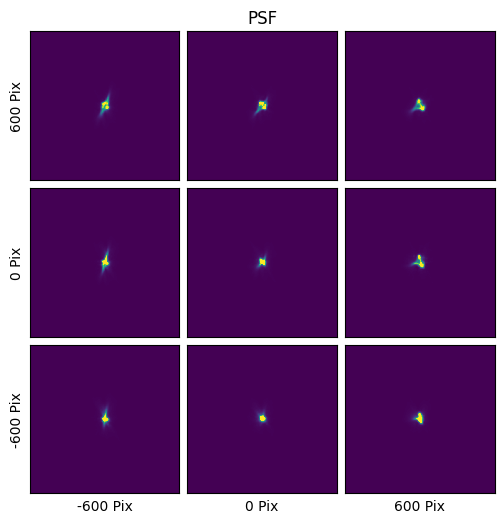

In [17]:
p.plot_spatial()

This plot shows the spatial changes for the PSF model. You can see the PSF changes significantly as you move across the detector. Let's look at the wavelength dependence.

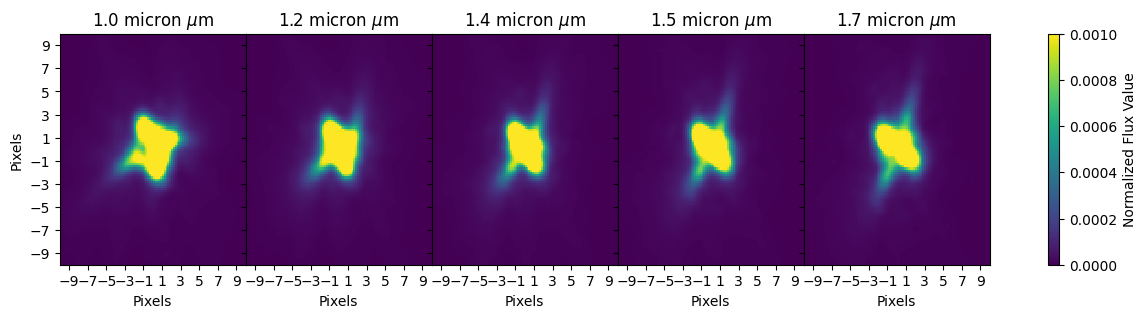

In [18]:
p.plot_spectral()

The PSF also changes in wavelength. This is expected. Let's calculate a PSF at a particular position.

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p>
        Note that the pixel position is with respect to the center of the detector.
    </p>
</div>

In [19]:
p.psf(row=100, column=-40, wavelength=1.3)

array([[1.1413812e-08, 1.1438539e-08, 1.1504300e-08, ..., 5.7991909e-09,
        6.2154766e-09, 6.5049841e-09],
       [1.1382001e-08, 1.1421678e-08, 1.1517125e-08, ..., 5.8108842e-09,
        6.1768644e-09, 6.4395862e-09],
       [1.1261743e-08, 1.1338595e-08, 1.1472190e-08, ..., 5.8173795e-09,
        6.1129120e-09, 6.3256094e-09],
       ...,
       [6.2430208e-09, 6.1320433e-09, 6.0301097e-09, ..., 6.4347923e-09,
        6.3768613e-09, 6.3250787e-09],
       [6.2202008e-09, 6.1017147e-09, 5.9619816e-09, ..., 6.2192496e-09,
        6.1606786e-09, 6.1071561e-09],
       [6.1357048e-09, 6.0286069e-09, 5.8950640e-09, ..., 6.0526073e-09,
        6.0041985e-09, 5.9568013e-09]], dtype=float32)

This matrix is the PSF at the input positions. Note that here `row` and `column` are position on the detector. The image of the PSF also has an extent in row and column, you can access that with `psf_row` and `psf_column`

In [20]:
p.psf_row

<Quantity [-50.46466549, -50.26792216, -50.07117882, -49.87443549,
           -49.67769215, -49.48094882, -49.28420548, -49.08746215,
           -48.89071881, -48.69397548, -48.49723214, -48.30048881,
           -48.10374547, -47.90700214, -47.7102588 , -47.51351547,
           -47.31677213, -47.1200288 , -46.92328546, -46.72654212,
           -46.52979879, -46.33305545, -46.13631212, -45.93956878,
           -45.74282545, -45.54608211, -45.34933878, -45.15259544,
           -44.95585211, -44.75910877, -44.56236544, -44.3656221 ,
           -44.16887877, -43.97213543, -43.7753921 , -43.57864876,
           -43.38190543, -43.18516209, -42.98841875, -42.79167542,
           -42.59493208, -42.39818875, -42.20144541, -42.00470208,
           -41.80795874, -41.61121541, -41.41447207, -41.21772874,
           -41.0209854 , -40.82424207, -40.62749873, -40.4307554 ,
           -40.23401206, -40.03726873, -39.84052539, -39.64378206,
           -39.44703872, -39.25029538, -39.05355205, -38.85680

We can plot this

In [21]:
import numpy as np
import matplotlib.pyplot as plt

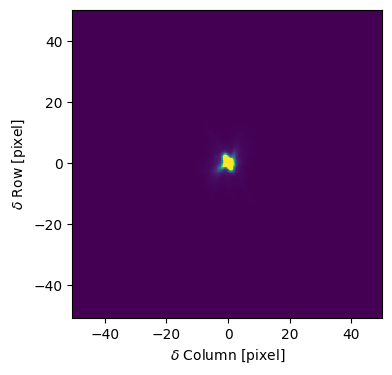

In [22]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pcolormesh(p.psf_column.value, p.psf_row.value, p.psf(row=100, column=-40, wavelength=1.3), vmin=0, vmax=0.001)
ax.set(xlabel='$\delta$ Column [pixel]', ylabel='$\delta$ Row [pixel]');

This looks good. This PSF model is at a higher resolution than the pixel grid. We have the x and y axes as $\delta$ Column and $\delta$ Row because this is the position with respect to the center of the target. We might want instead to find the PRF; the Pixel Response function. This is the PSF integrated across the pixels of the detector.

In [23]:
p.prf(row=10, column=1, wavelength=1.3)

(array([-42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30,
        -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17,
        -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,
         -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
         10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
         23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
         36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
         62]),
 array([-51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
        -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26,
        -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13,
        -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19

This has now returned the row and column position on the detector, as well as the image. Let's plot it

In [24]:
r, c, ar = p.prf(row=100, column=-40, wavelength=1.3)

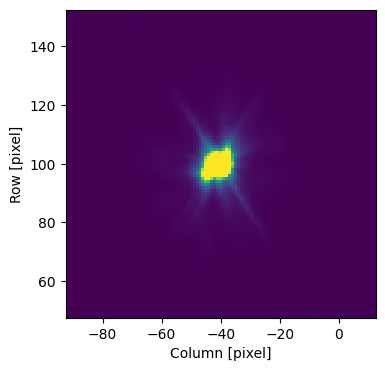

In [25]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pcolormesh(c, r, ar, vmin=0, vmax=0.001)
ax.set(xlabel='Column [pixel]', ylabel='Row [pixel]');

This is now at the pixel resolution. 

Large numbers of dimensions make calculating the PRF or PSF model slower, because we have to integrate over many dimensions. We might want to calculate the PRF in a small region of the detector, in which case we might want to freeze certain dimensions. We can do that here

In [26]:
p = PSF.from_name("NIRDA").freeze_dimension(row=0, column=0)

Here we have loaded the NIR PSF and "frozen" the row and column dimensions to 0.

In [27]:
p

1D PSF Model [wavelength] (Frozen: row: 0.000, column: 0.000)

This is now a 1D model, and is only a function of wavelength. This should be faster to calculate the PRF.

Similarly, you can freeze the PSF as a function of wavelength

In [28]:
p = PSF.from_name("NIRDA").freeze_dimension(wavelength=1.3)

In [29]:
p

2D PSF Model [row, column] (Frozen: wavelength: 1.300)

<div class="admonition warning">
    <p class="admonition-title">Using Units</p>
    <p>
        `pandorapsf` uses units to ensure that wavelength and position are correct. If you pass in unitless values as I am doing above, `pandorapsf` will assume they are the units of those axes. To be safe, you should consider passing in values with units, for example see below.
    </p>
</div>

In [30]:
import astropy.units as u
p = PSF.from_name("NIRDA").freeze_dimension(wavelength=1300*u.nm)

In [31]:
p

2D PSF Model [row, column] (Frozen: wavelength: 1300.000 nm)

## Gradients

You may find you need to use gradients of the PSF or PRF, these are available to you

In [32]:
r, c, ar, dar1, dar2 = p.prf(row=100, column=-40, gradients=True)

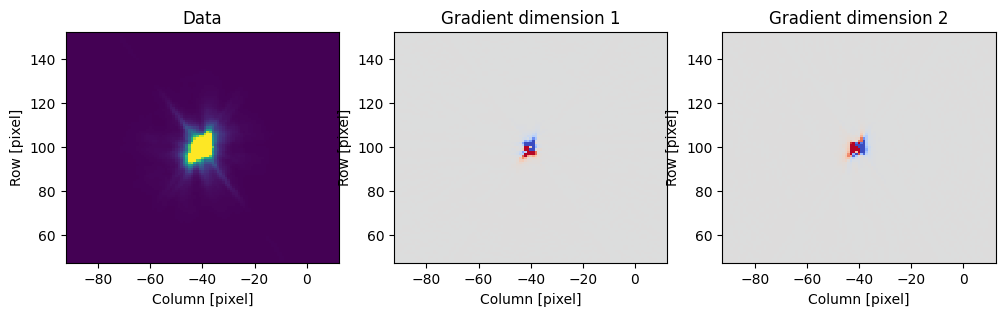

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].pcolormesh(c, r, ar, vmin=0, vmax=0.001)
ax[1].pcolormesh(c, r, dar1, vmin=-0.001, vmax=0.001, cmap='coolwarm')
ax[2].pcolormesh(c, r, dar2, vmin=-0.001, vmax=0.001, cmap='coolwarm')
ax[0].set(xlabel='Column [pixel]', ylabel='Row [pixel]', title='Data')
ax[1].set(xlabel='Column [pixel]', ylabel='Row [pixel]', title='Gradient dimension 1')
ax[2].set(xlabel='Column [pixel]', ylabel='Row [pixel]', title='Gradient dimension 2');

These gradients are useful for approximating small shifts in position.

## Scaling PSFs

You can use the `scale` parameter to increase or decrease the effective size of the PSF. This scales the `psf_row` and `psf_column` attributes so that the resultant PRF is larger or smaller on the detector.

In [34]:
p1 = PSF.from_name("NIRDA", scale=1)
p2 = PSF.from_name("NIRDA", scale=2)

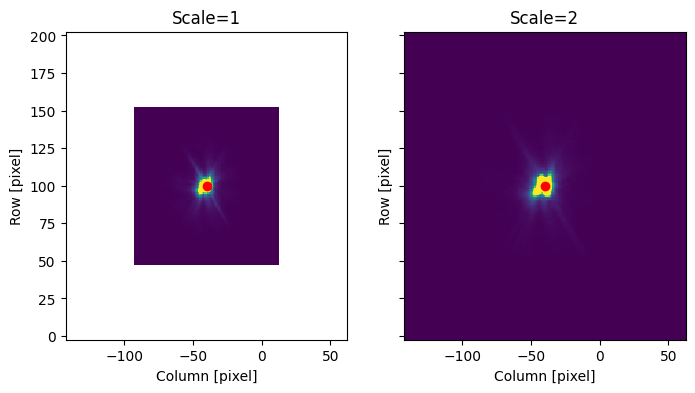

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

r, c, ar = p1.prf(row=100, column=-40, wavelength=1.3)
ax[0].scatter(-40, 100, c='r', zorder=10)
ax[0].pcolormesh(c, r, ar, vmin=0, vmax=0.001)
ax[0].set(xlabel='Column [pixel]', ylabel='Row [pixel]', title='Scale=1');

r, c, ar = p2.prf(row=100, column=-40, wavelength=1.3)
ax[1].pcolormesh(c, r, ar, vmin=0, vmax=0.001)
ax[1].scatter(-40, 100, c='r', zorder=10)
ax[1].set(xlabel='Column [pixel]', ylabel='Row [pixel]', title='Scale=2');